In [1]:
# Import essential libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Load the dataset
df = pd.read_csv("creditcard.csv")

# Display the first few rows
print(df.head())

# Check class distribution (0 = Genuine, 1 = Fraud)
print("\nClass distribution:")
print(df['Class'].value_counts())


   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [3]:
# Normalize the 'Amount' column using StandardScaler
scaler = StandardScaler()
df['NormalizedAmount'] = scaler.fit_transform(df[['Amount']])

# Drop 'Time' and original 'Amount' columns as they are no longer needed
df = df.drop(['Time', 'Amount'], axis=1)

# Show the updated dataframe structure
print("\nUpdated DataFrame columns:")
print(df.columns)



Updated DataFrame columns:
Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class',
       'NormalizedAmount'],
      dtype='object')


In [5]:
# Check and remove rows with missing values (if any)
print("Missing values in each column:\n", df.isnull().sum())

# Drop rows with NaN just to be safe
df = df.dropna()

# Separate features and target again (after cleaning)
X = df.drop('Class', axis=1)
y = df['Class']

# Now apply SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

# Show balanced class distribution
print("\nClass distribution after SMOTE:")
print(pd.Series(y_res).value_counts())


Missing values in each column:
 V1                  0
V2                  0
V3                  0
V4                  0
V5                  0
V6                  1
V7                  1
V8                  1
V9                  1
V10                 1
V11                 1
V12                 1
V13                 1
V14                 1
V15                 1
V16                 1
V17                 1
V18                 1
V19                 1
V20                 1
V21                 1
V22                 1
V23                 1
V24                 1
V25                 1
V26                 1
V27                 1
V28                 1
Class               1
NormalizedAmount    1
dtype: int64

Class distribution after SMOTE:
Class
0.0    29704
1.0    29704
Name: count, dtype: int64


In [6]:
# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42
)

# Show the shape of the datasets
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (41585, 29)
Testing set shape: (17823, 29)


In [7]:
# Create and train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

print("Model training completed.")


Model training completed.



Classification Report:

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      8897
         1.0       1.00      1.00      1.00      8926

    accuracy                           1.00     17823
   macro avg       1.00      1.00      1.00     17823
weighted avg       1.00      1.00      1.00     17823



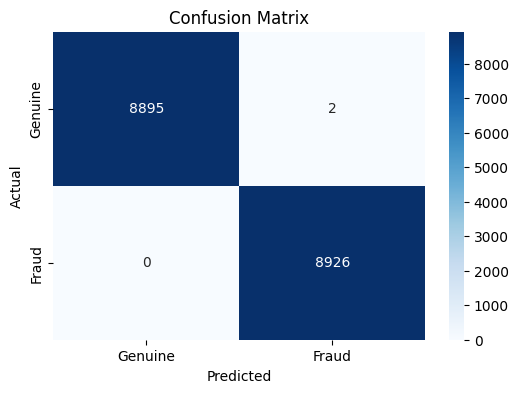

In [8]:
# Predict on test set
y_pred = model.predict(X_test)

# Classification report: includes precision, recall, F1-score
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Genuine", "Fraud"],
            yticklabels=["Genuine", "Fraud"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
